In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import adjusted_rand_score

In [14]:
np.random.seed(42)

In [15]:
project_dir = 'D:\\Heart_Disease_Project'
os.makedirs(project_dir, exist_ok=True)
os.makedirs(os.path.join(project_dir, 'notebooks'), exist_ok=True)
os.makedirs(os.path.join(project_dir, 'results'), exist_ok=True)

In [16]:
reduced_data_path = os.path.join(project_dir, 'data', 'heart_disease_reduced.csv')
df = pd.read_csv(reduced_data_path)
X = df.drop('target', axis=1) 
y = df['target']

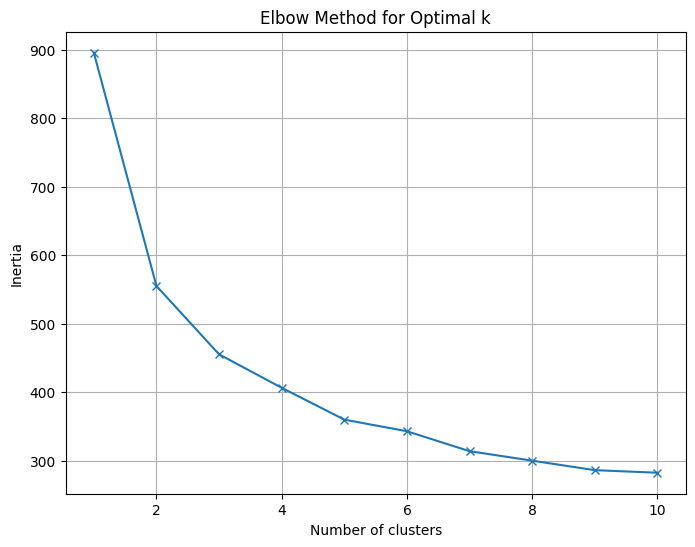

Elbow plot saved to D:\Heart_Disease_Project\results\elbow_method.png


In [8]:
inertia = []
k_range = range(1,11)
for k in k_range:
    k_means = KMeans(n_clusters=k, random_state=42)
    k_means.fit(X)
    inertia.append(k_means.inertia_)
plt.figure(figsize=(8,6))
plt.plot(k_range, inertia, marker='x')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
elbow_plot_path = os.path.join(project_dir, 'results', 'elbow_method.png')
plt.savefig(elbow_plot_path)
plt.show()
print(f"Elbow plot saved to {elbow_plot_path}")

In [17]:
K = 3
k_means = KMeans(n_clusters=K, random_state=42)
k_means_labels = k_means.fit_predict(X)

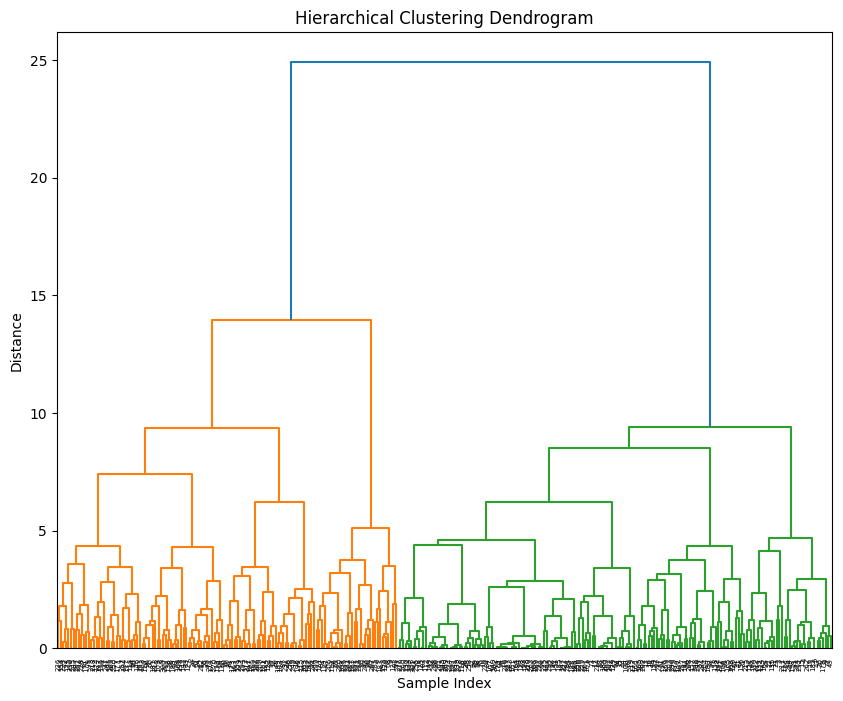

Dendrogram saved to D:\Heart_Disease_Project\results\dendrogram.png


In [12]:
linked = linkage(X, method='ward')
plt.figure(figsize=(10,8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram_plot_path = os.path.join(project_dir, 'results', 'dendrogram.png')
plt.savefig(dendrogram_plot_path)
plt.show()
print(f"Dendrogram saved to {dendrogram_plot_path}")


In [18]:
hierarchical_labels = fcluster(linked, t=K, criterion='maxclust')

In [19]:
ari_k_means = adjusted_rand_score(y, k_means_labels)
ari_hierarchical =adjusted_rand_score(y, hierarchical_labels)
print(f"\nAdjusted Rand Index (ARI) for K-Means: {ari_k_means:.4f}")
print(f"Adjusted Rand Index (ARI) for Hierarchical Clustering: {ari_hierarchical:.4f}")


Adjusted Rand Index (ARI) for K-Means: 0.3099
Adjusted Rand Index (ARI) for Hierarchical Clustering: 0.2505


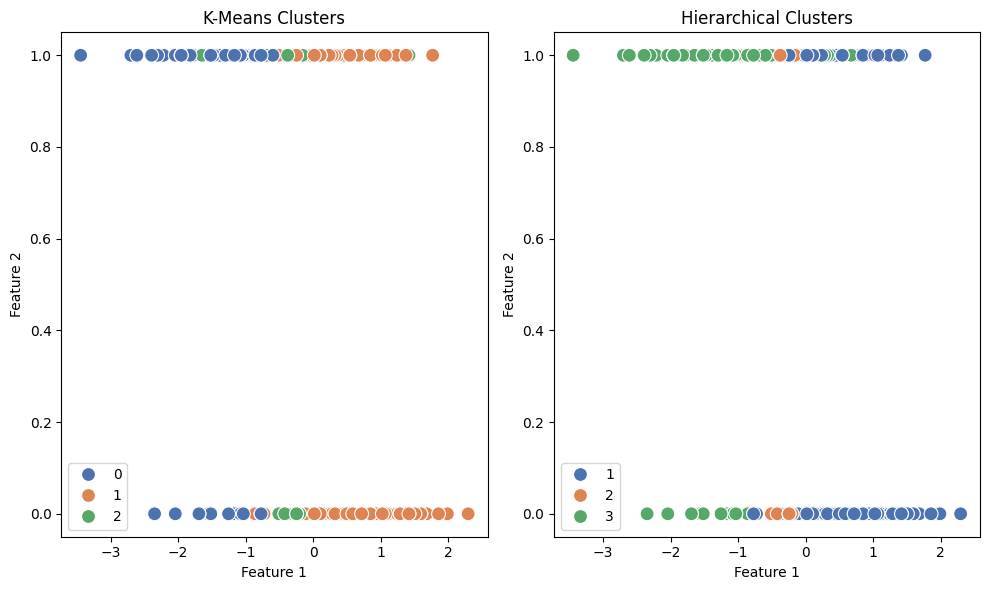

Cluster visualization saved to D:\Heart_Disease_Project\results\cluster_visualization.png


In [20]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue = k_means_labels, palette='deep', s=100)
plt.title('K-Means Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1,2,2)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue = hierarchical_labels, palette='deep', s=100)
plt.title('Hierarchical Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

cluster_plot_path = os.path.join(project_dir, 'results', 'cluster_visualization.png')
plt.tight_layout()
plt.savefig(cluster_plot_path)
plt.show()
print(f"Cluster visualization saved to {cluster_plot_path}")